<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 알고리즘 설명 및 실습 코드

In [1]:
# 라이브러리 불러오기
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 불러오기
iris = datasets.load_iris() # datasets에 탑재된 기본 데이터
features = iris.data # iris꽃의 꽃받침 길이와 폭. 꽃잎의 길이와 폭.

### Slice

파이썬 에서는 객체들이 연속적으로 들어있는 자료형(리스트, 튜플, 문자열)일 경우, 원하는 부분만을 잘라서(slice) 사용할 수 있다.

보통 [ 시작위치(숫자) : 끝나는위치(숫자) ] 의 형태로 사용하며, 시작위치는 0부터 시작함을 주의해야한다.

예) 리스트 a에 대해 a = [2, 3, 4] 일 경우, 이에 대한 주소(인덱스)값은  a[0] , a[1], a[2] 이와 같이 표현된다. 

In [2]:
iris.data[0:5], iris.target[0:5] # 현 자료형으로는 탐색이 불편하므로 pandas라이브러리의 dataframe형태로 바꾸겠다.

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]), array([0, 0, 0, 0, 0]))

In [3]:
import pandas as pd 
species = pd.DataFrame(iris.target) # iris.target값 0,1,2는 iris꽃종류 3가지를 의미한다.
species.columns = ['Species'] # species 데이터프레임의 열 이름 설정
data = pd.DataFrame(iris.data)
data.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width'] # data 데이터프레임의 열 이름 설정
data = pd.concat([data,species],axis=1) # 세로축(axis=1)으로 두 데이터프레임(data, species)을 병합(concat)한다.
data.head() # 데이터 프레임 맨 앞(상위) 5개의 값을 출력한다.

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 데이터 시각화

출처 : https://computer-nerd.tistory.com/53

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


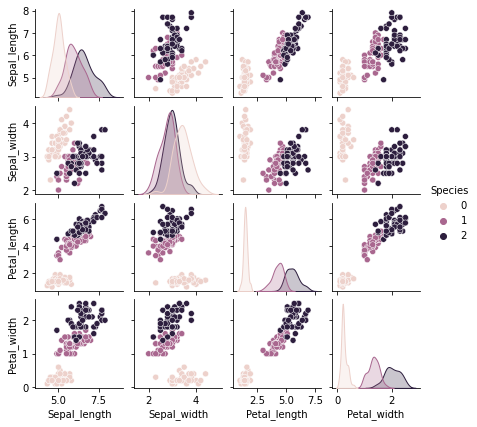

In [4]:
# 시각화에 자주 사용되는 라이브러리 (matplotlib과 seaborn은 기억해 두는 것이 좋다)
import matplotlib.pyplot as plt
import seaborn as sns 
 
sns.pairplot(data, hue="Species", size=1.5) # hue=데이터의 '특정 기준열' 지정. 이에따라 색깔이 달라진다. size=그림의 크기.
# hue에 있는 Species열을 기준(hue)으로, data의 모든 변수를 두개씩 짝지어(pair) 그림을 그린다(plot)

<function matplotlib.pyplot.legend(*args, **kwargs)>

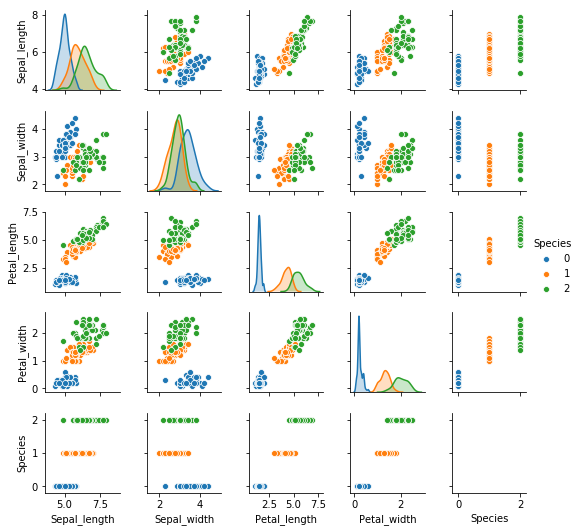

In [ ]:
# 경고 제거( 붉은 error 메시지 무시 )
import warnings
warnings.filterwarnings(action='ignore') # action='default'(경고출력) 'ignore'(각종 경고메세지 무시)
 
# 경고 무시 후 재출력    
sns.pairplot(data, hue="Species", size=1.5) # hue=데이터의 '특정 기준열' 지정. 이에따라 색깔이 달라진다.
plt.legend
# size=그림의 크기.
# hue에 있는 Species열을 기준(hue)으로, data의 모든 변수를 두개씩 짝지어(pair) 그림을 그린다(plot)

### ※ palette 옵션
seaborn 패키지를 사용시 출력결과물의 색깔을 다양하게 설정 가능하며 그 종류는 무궁무진하다.

참고 : https://seaborn.pydata.org/tutorial/color_palettes.html

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


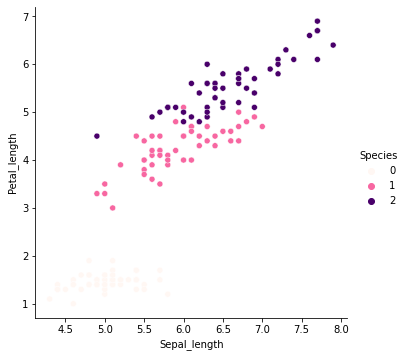

In [5]:
sns.pairplot(data, x_vars=['Sepal_length'], y_vars=['Petal_length'], hue='Species', size=5, palette='RdPu')
# x_vars : x축 변수 설정. y_vars : y축 변수 설정.  ※ palette의 default옵션(색깔)은 'bright'다

### k-means 모델 생성

##### 정규화 (Normalization) vs 표준화(Standardization)

* 정규화는 모든 특성 값의 범위를 [0,1]로 옮기며 가장 큰 값은 1, 가장 작은값은 0으로 되도록 규모를 맞춘다.

* 표준화는 각 특성 값에서 평균값을 제하고, 표준편차로 나누어서 표준정규분포를 따르도록 규모를 맞추며 데이터가 종모양의 분포를 따른다 가정한다. 아래의 StandardScaler는 이러한 표준화 과정을 자동으로 거치도록 해준다.

* 둘 다 특성 스케일링(데이터 스케일링)의 일환이며, K-means는 거리 '계산값'을 기반으로 한 알고리즘이기에 스케일링과정이 꼭 필요하다.


출처 : https://bskyvision.com/849

In [6]:
# 특성 스케일링(데이터 스케일링)
scaler = StandardScaler()
features = data # 앞서 Pandas의 Dataframe형태로 바뀐 iris.data값 
features_std = scaler.fit_transform(features)

In [12]:
features_std.shape # features_std 모양

(150, 5)

#### KMeans 함수 파라미터 설명

n_cluster = 생성하고자 하는 군집의 수(곧, k와 같음)

random_state = 난수 인자. 코드 실행시마다 결과가 달라지는 것을 방지

n_jobs = 모델 계산에 사용할 쓰레드 수. -1로 설정시 최대한의 빠르기로 계산.

In [7]:
# K-means 모델 생성
k = 3
Cluster = KMeans(n_clusters=k , random_state=0, n_jobs=-1)

# Train model 
model = Cluster.fit(features_std) # fit을 통해 iris data가 KMeans모델에 '적합'(적용)되어 분류된다. 
y_pred = pd.DataFrame(model.predict(features_std)) # KMeans알고리즘을 통해 예측된 분류결과(품종 0, 1, 2)

#군집 분류 결과
y_pred[0].value_counts() # 모든 품종이 고르게 예측되었으나, 실제론 50개씩 존재하므로 다소 오류가 존재함을 알 수 있다.

2    54
1    50
0    46
Name: 0, dtype: int64

#### 분류 결과 시각화

**※ reshape를 하는 이유 - features_std[:,0]의 모양이 [150,] 이지만 y_pred는 [150,1]이며 두 형태가 같아야 plot이 가능해지기 때문.**

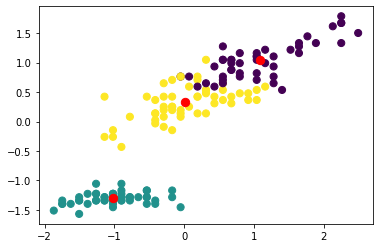

In [8]:
# 군집분류 결과 시각화

plt.scatter((features_std[:, 0]).reshape(-1,1), (features_std[:, 2]).reshape(-1,1), c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_ # 알고리즘 적용후 최종적으로 찾아진 중심점
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=70, alpha=1) # c = 색깔, s = 크기, alpha = 굵기

In [ ]:
# 정규화 역계산 및 시각화
# Scaling하여 변한 값을 다시 원래의 값(길이)으로 전환한 뒤, 시각화

features_origin = scaler.inverse_transform(features_std) # inverse_transform : scaling 전의 값을 계산해서 반환해준다.
centers_origin = scaler.inverse_transform(centers)

# c = y_pred? 알고리즘 예측값에 따라 색깔이 구별된다.
plt.scatter((features_origin[:, 0]).reshape(-1,1), (features_origin[:, 2]).reshape(-1,1), c=y_pred, s=50, cmap='viridis')
plt.scatter(centers_origin[:, 0], centers_origin[:, 2], c='red', s=70, alpha=1);

plt.xlabel("Sepal_length") # x축 제목 
plt.ylabel("Petal_length") # y축 제목
plt.title("After K-means Clustering") # 그래프 제목

ValueError: operands could not be broadcast together with shapes (150,5) (12,) (150,5) 

## 연습 예제

**예제1)**

**iris 데이터 원본에 대하여 Sepal_length를 x축, Petal_length를 y축으로 하는 scatter plot을 그려보시오.**

**Hint : 위에서 저장한 data데이터프레임에 대하여 iloc 혹은 loc를 활용**

Text(0.5,1,'Actual Cluster')

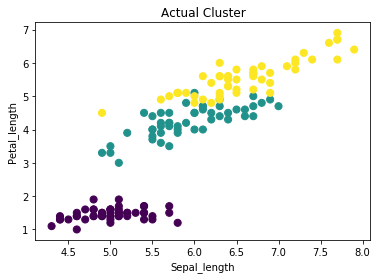

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,2], c=data.Species, s=50, cmap='viridis')
# 군집별 색깔이 위와 다른 것은 문제 되지 않는다.

plt.xlabel("Sepal_length") # x축 제목
plt.ylabel("Petal_length") # y축 제목
plt.title("Actual Cluster") # 그래프 제목

**예제2)**

**2-1)아래의 코드를 참고하여 외부 데이터를 outer_data에 저장해보고 상위 5개의 데이터를 출력해 보시오.**

In [ ]:
outer_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red', sep="\;",engine="python") 
outer_data.head()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**2-2) 위 데이터를 StandardScaler로 표준화 해보고 K-Means알고리즘을 활용하여 분류해보시오**

**※K값은 자율 설정**

In [ ]:
outer_std = scaler.fit_transform(outer_data)
K=2
cluster = KMeans(n_clusters=K , random_state=0, n_jobs=-1)

# Train model 
outer_model = cluster.fit(outer_std) 
outer_y_pred = pd.DataFrame(outer_model.predict(outer_std)) 

#군집 분류 결과
outer_y_pred[0].value_counts() 

0    1017
1     582
Name: 0, dtype: int64

#### 2-3)위 분류 결과를 시각화 해보고 k는 몇으로 설정하는 것이 좋을지 생각해보시오

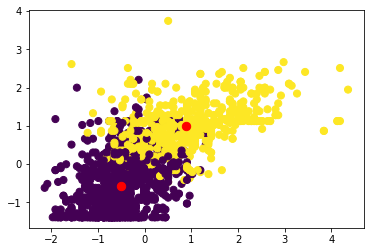

In [ ]:
# 군집분류 결과 시각화 -> 이 데이터는 원래 별도의 군집화에 적절한 데이터는 아니나 별도의 전처리가 필요하지 않아 코드 연습용으로 사용했다. 

plt.scatter((outer_std[:, 0]).reshape(-1,1), (outer_std[:, 2]).reshape(-1,1), c=outer_y_pred, s=50, cmap='viridis')

outer_centers = outer_model.cluster_centers_ # 알고리즘 적용후 최종적으로 찾아진 중심점
plt.scatter(outer_centers[:, 0], outer_centers[:, 2], c='red', s=70, alpha=1) # c = 색깔, s = 크기, alpha = 굵기

### 적절한 k의 개수를 알 수 없을 때
#### 클러스터(군집) 내부 평가 기법(Elbow Method)

 k-means는 클러스터 내부의 밀집도인 클러스터내 오차제곱합(SSE)이라는 지표를 최소화 할 수 있도록 중심을 결정해나간다. k값이 클수록 SSE는 줄어드나, 어느 순간 줄어드는 비율이 급격하게 작아지는 부분(Elbow)을 최적의 클러스터 개수라고 판단한다. 

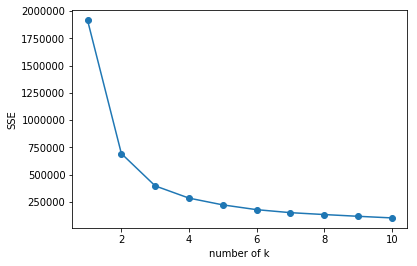

In [ ]:
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('number of k')
    plt.ylabel('SSE')
    plt.show()
elbow(outer_data)

### 파일 업로드

* Jupyter Notebook엔 외부 파일 업로드시 상대참조/절대참조 개념이 존재한다.
* 이 파트에선 각기 가장 간단한 파일 업로드 및 활용 방법을 소개한다.

★실제 수업시, #상대참조 #절대참조 앞부분은 작동하지 않을 것이므로(개인 컴퓨터 폴더상황에 따라 달라짐)
가장 밑에 서술되어 있는

path2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'  부분을 소개하고 활용하시면 될 것 같습니다.

In [ ]:
# 상대참조
import pandas as pd
path = './' #현재 작업중인 Untitled와 같은 위치에 파일이 있는 경우
data = pd.read_csv('snsdata.csv') # 불러오고자 하는 '파일명.확장자'
data.head(3)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#절대참조 - 다운로드 받은 파일의 주소 활용
path1 = 'C:/Users/황회선/Ds/' # 백슬래시(\) 대신 슬래시(/)를 써야 오류가 나지 않는다.
data1 = pd.read_csv(path1+'snsdata.csv',sep='\,',engine="python") # 파일경로 + '파일명.확장자' , sep=데이터 분리 방식
data1.head(3)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#절대참조 - 해당 웹사이트(UCI) dataset의 주소 활용
path2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/' 
data2 = pd.read_csv(path2+'winequality-red',sep='\;',engine="python") # engine="python"으로 하지 않을시 OS 에러 발생.
data2.head(3)

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
